[1] 지역별 지출액 자료 <hr>

In [1]:
## [1-1] 모듈 로딩 
import pandas as pd      # 데이터 분석 및 전처리 관련 모듈 
import numpy as np       # NaN/NAN/nan 즉, 빈칸 표시 관련 모듈
from landamark import *
from pay import *
from traffic_sat import *
from visitor import *
from festival import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
font_name=fm.FontProperties(fname='C:\Windows\Fonts\HancomHoonminjeongeumH.ttf').get_name()
rc('font', family=font_name)

c:\Users\gy931\OneDrive\Desktop\KDP-7\1.프로젝트\visitor.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tourist_statics1.fillna(method='ffill', inplace=True)
c:\Users\gy931\OneDrive\Desktop\KDP-7\1.프로젝트\visitor.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.drop_duplicates(inplace=True)


          시도    군구      총 인원수
0      서울특별시   종로구  6958410.0
1      서울특별시    중구  8655443.0
2      서울특별시   용산구  4007431.0
3      서울특별시  동대문구   104836.0
4      서울특별시   노원구    62512.0
..       ...   ...        ...
239     경상남도   함양군  1204556.0
240     경상남도   거창군   665097.0
241     경상남도   합천군  1365692.0
242  제주특별자치도   제주시  3833131.0
244  제주특별자치도  서귀포시  6919471.0

[199 rows x 3 columns]


In [2]:
'''
총 11개
DF: 대단위 소단위 분기별 방문객수
region_sum_DF: 대단위 분기별 방문객 수
region_all_sum_DF: 대단위 별 연간 방문객 수
season_region_DF: 대단위 분기별 최다 방문객 소단위
total_region_DF: 대단위 별 연간 최다 방문객 소단위
landmarkDF: all_sheet의 관광지 명까지의 DataFrame
landmark_smallDF: 각 구/군별로 관광지 수를 합한 DataFrame
landmark_best_smallDF: 대단위 내 가장 많은 관광지 수의 구/군 DataFrame
landmark_bigDF: 각 시별로 관광지 수를 합한 DataFrame
payDF: 지역별 지출액
traffic_satDF: 지역별 교통만족도
'''

'\n총 11개\nDF: 대단위 소단위 분기별 방문객수\nregion_sum_DF: 대단위 분기별 방문객 수\nregion_all_sum_DF: 대단위 별 연간 방문객 수\nseason_region_DF: 대단위 분기별 최다 방문객 소단위\ntotal_region_DF: 대단위 별 연간 최다 방문객 소단위\nlandmarkDF: all_sheet의 관광지 명까지의 DataFrame\nlandmark_smallDF: 각 구/군별로 관광지 수를 합한 DataFrame\nlandmark_best_smallDF: 대단위 내 가장 많은 관광지 수의 구/군 DataFrame\nlandmark_bigDF: 각 시별로 관광지 수를 합한 DataFrame\npayDF: 지역별 지출액\ntraffic_satDF: 지역별 교통만족도\n'

Text(0.5, 1.0, '교통만족도와 연간 방문객 수 비교')

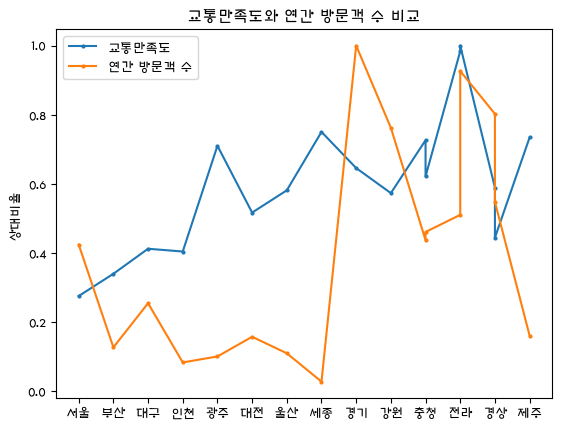

In [3]:
# [분석1]
# 지역별 교통만족도 & 시도별 연간 총 방문객 수 연관
# 타입: 숫자비교
traffic_satDF['시도']=landmark_best_smallDF.iloc[:,0]
traffic_satDF.iloc[:,1].min()
traffic_satDF.iloc[:,1]=traffic_satDF.iloc[:,1]-70
traffic_satDF
a=traffic_satDF.iloc[:,1].max()
b=region_all_sum_DF.iloc[:,1].max()
traffic_satDF.iloc[:,1]=traffic_satDF.iloc[:,1]/a
region_all_sum_DF.iloc[:,1]=region_all_sum_DF.iloc[:,1]/b
traffic_satDF
xdata=[]
for x in landmark_best_smallDF.iloc[:,0]:
    xdata.append(x[:2])
plt.plot(xdata,traffic_satDF.iloc[:,1],'o-',label='교통만족도',ms=2)
plt.plot(xdata,region_all_sum_DF.iloc[:,1],'o-',label='연간 방문객 수',ms=2)
traffic_satDF
plt.legend()
plt.ylabel('상대비율')
plt.title('교통만족도와 연간 방문객 수 비교')



C:\Users\gy931\AppData\Local\Temp\ipykernel_14760\2835436061.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.188179
1     0.314066
2     0.075619
3     0.121976
4     0.035202
5     0.067507
6     0.056932
7     0.018108
8     0.568883
9     0.905114
10    0.170795
11    0.348110
12    0.267855
13    0.460524
14    0.438650
15    0.440678
16    1.000000
Name: 지출액, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  payDF.iloc[:,1]=payDF.iloc[:,1]/a


Text(0.5, 1.0, '지출액과 연간 방문객 수 비교')

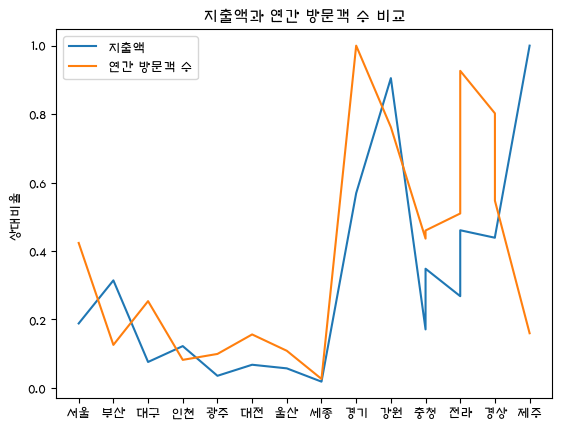

In [4]:
# [분석2]
# 지역별 지출액 & 시도별 연간 총 방문객 수 연관
# 타입: 숫자비교
payDF['시도']=landmark_best_smallDF.iloc[:,0]
a=payDF.iloc[:,1].max()
b=region_all_sum_DF.iloc[:,1].max()
payDF.iloc[:,1]=payDF.iloc[:,1]/a
region_all_sum_DF.iloc[:,1]=region_all_sum_DF.iloc[:,1]/b
payDF
xdata=[]
for x in landmark_best_smallDF.iloc[:,0]:
    xdata.append(x[:2])
plt.plot(xdata,payDF.iloc[:,1],label='지출액')
plt.plot(xdata,region_all_sum_DF.iloc[:,1],label='연간 방문객 수')
plt.legend()
plt.ylabel('상대비율')
plt.title('지출액과 연간 방문객 수 비교')

In [5]:
# [분석3]
# 지역별 시도별 관광지 수 & 시도별 연간 총 방문객 수 연관
# 타입: 숫자비교
DF1.reset_index(drop=True,inplace=True)
# landmark_smallDF와 DF1 shape 일치 안함
# landamrk 행 추가 필요	
# - index: 98 충청북도 청주시
# - index: 143 전라남도 구례군
# - index: 145 전라남도 보성군
# - index: 166 경상북도 상주시
DF1
sr1=pd.DataFrame([['충청북도','청주시',0]],columns=DF1.columns)
sr2=pd.DataFrame([['전라남도','구례군',0]],columns=DF1.columns)
sr3=pd.DataFrame([['전라남도','보성군',0]],columns=DF1.columns)
sr4=pd.DataFrame([['경상북도','상주시',0]],columns=DF1.columns)
DF1=pd.concat([DF1.iloc[:98,:],sr1,
           DF1.iloc[98:143,:],
           sr2,DF1.iloc[143:145,:],
           sr3,DF1.iloc[145:166,:],
          sr4,DF1.iloc[166:,:]])
# 최고값 찾고 비율 만들기
a=DF1.iloc[:,2].max()
b=landmark_smallDF.iloc[:,2].max()
b
DF1.iloc[:,2]
# 비율 설정
DF1.iloc[:,2]=DF1.iloc[:,2]/a
landmark_smallDF.iloc[:,2]=landmark_smallDF.iloc[:,2]/b
DF1


C:\Users\gy931\AppData\Local\Temp\ipykernel_14760\2227651483.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.046512
1      0.034884
2      0.011628
3      0.023256
4      0.011628
         ...   
198    0.209302
199    0.093023
200    0.232558
201    0.186047
202    0.232558
Name: 관광지 수, Length: 203, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  landmark_smallDF.iloc[:,2]=landmark_smallDF.iloc[:,2]/b


,시도,군구,총 인원수
0,서울특별시,종로구,0.386089
1,서울특별시,중구,0.480249
2,서울특별시,용산구,0.222353
3,서울특별시,동대문구,0.005817
4,서울특별시,노원구,0.003468
...,...,...,...
194,경상남도,함양군,0.066835
195,경상남도,거창군,0.036903
196,경상남도,합천군,0.075776
197,제주특별자치도,제주시,0.212682


Text(0.5, 0, '대한민국 임의 지역번호')

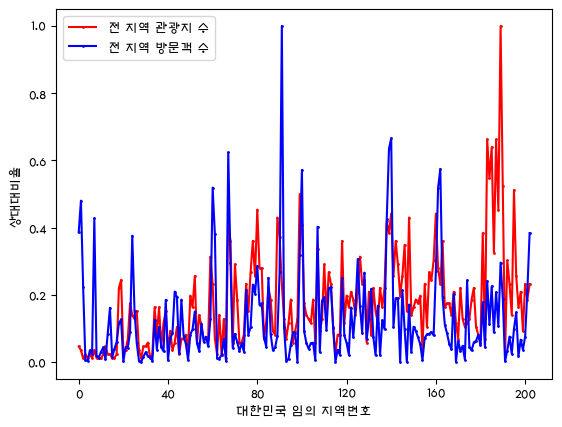

In [6]:
# [그래프 그리기]
xdata=[]
for x in landmark_smallDF.iloc[:,2]:
    xdata.append(x)
ydata=[]
for x in DF1.iloc[:,2]:
    ydata.append(x)
plt.plot(range(203),xdata,'ro-',ms=1,label='전 지역 관광지 수')
plt.plot(range(203),ydata,'bo-',ms=1, label='전 지역 방문객 수')
plt.xticks(range(203)[::40])
plt.legend()
plt.ylabel('상대대비율')
plt.xlabel('대한민국 임의 지역번호')




Text(0.5, 1.0, '지역 별 관광지 수와 지역 별 연간 방문객 비교')

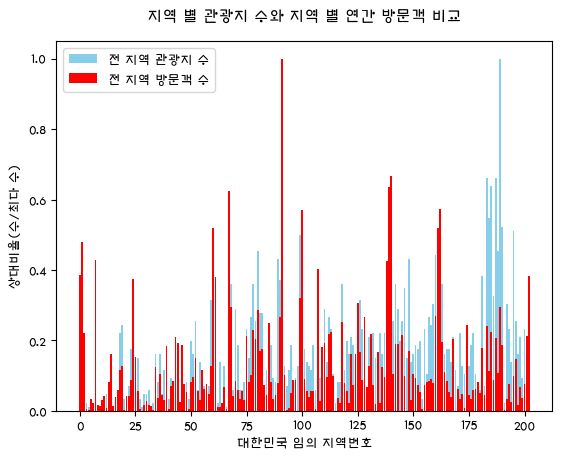

In [7]:
xdata=range(203)
ydata=landmark_smallDF.iloc[:,2]
zdata=DF1.iloc[:,2]
plt.bar(xdata,ydata,color=('skyblue'),label='전 지역 관광지 수')
plt.bar(xdata,zdata,color=('r'),label='전 지역 방문객 수')
plt.legend()
plt.ylabel('상대비율(수/최다 수)')
plt.xlabel('대한민국 임의 지역번호')
plt.title('지역 별 관광지 수와 지역 별 연간 방문객 비교',pad=15)

In [8]:
# 지역별 시도별 내 최다 관광지 수 구/군 & 시도별 내 최다 방문객 수 구/군
# 타입: 문자 비교 -> 확률
total_region_DF
landmark_best_smallDF
for x in range(len(total_region_DF.index)):
    match=total_region_DF.iloc[:,1]==landmark_best_smallDF.iloc[:,1]
match_value=(match.values.sum()/len(total_region_DF.index))*100
match_value=round(match_value,2)
match_value

np.float64(41.18)

Text(0, 0.5, '상대비율(수/최다 수)')

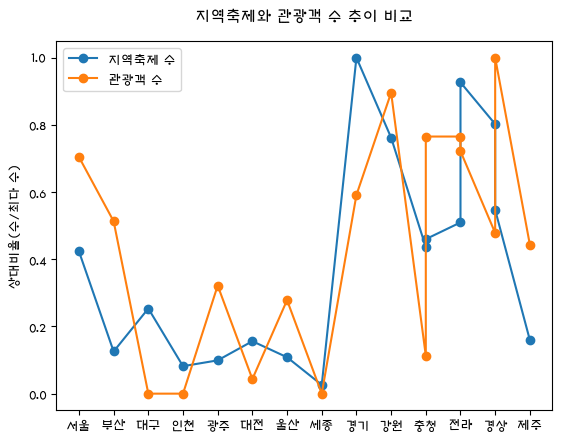

In [9]:
# [분석5]
# 분기별 지역 축제 수 & 시도별 연간 방문객 수
# 타입: 숫자비교
# 전체 숫자를 0 ~ 1사이수로 표현하여 그래프 비교(가장 높은 수를 1로 표현)
# 전국 방문 객수 총 인원수 중 가장 높은 수
a=region_all_sum_DF.iloc[:,1].max()
# 관광지 수 중 가장 높은 수
b=fest_unique_DF.iloc[:,1].max()
b
# 각 데이터 열에 해당 값 나누기
region_all_sum_DF.iloc[:,1]/a
fest_unique_DF.iloc[:,1]/b
xdata=[]
for x in fest_unique_DF.iloc[:,0]:
    xdata.append(x[:2])
plt.plot(xdata,region_all_sum_DF.iloc[:,1]/a,'o-',label='지역축제 수')
plt.plot(xdata,fest_unique_DF.iloc[:,1]/b,'o-',label='관광객 수')
plt.legend()
plt.title('지역축제와 관광객 수 추이 비교',pad=15)
plt.ylabel('상대비율(수/최다 수)')

Text(0, 0.5, '지역축제 수')

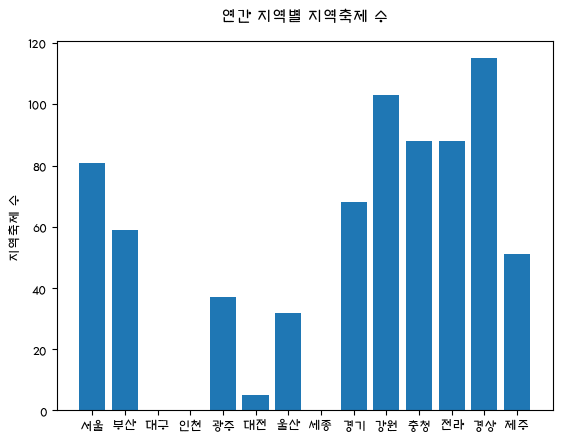

In [10]:
xdata=[]
for x in fest_unique_DF.iloc[:,0]:
    xdata.append(x[:2])
plt.bar(xdata,fest_unique_DF.iloc[:,1])
plt.title('연간 지역별 지역축제 수',pad=15)
plt.ylabel('지역축제 수')